In [1]:
import pydpmd as dp
from tqdm import tqdm
from pydpmd.plot import draw_particles_frame
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from pydpmd.data import load
import numpy as np
import scipy as sp
from mode_resources import *

# Disk

In [2]:
data = load('/home/mmccraw/dev/data/10-14-25/effective-potential/jamming-small/disk/jamming_0/', location=["final"])

ValueError: area: expected shape (0,), got (10000,)

In [20]:
H_disk, M_disk, val_disk, vec_disk, non_rattler_ids_disk = get_dynamical_matrix_modes_for_disk(data)

100%|██████████| 1000/1000 [00:21<00:00, 46.09it/s]


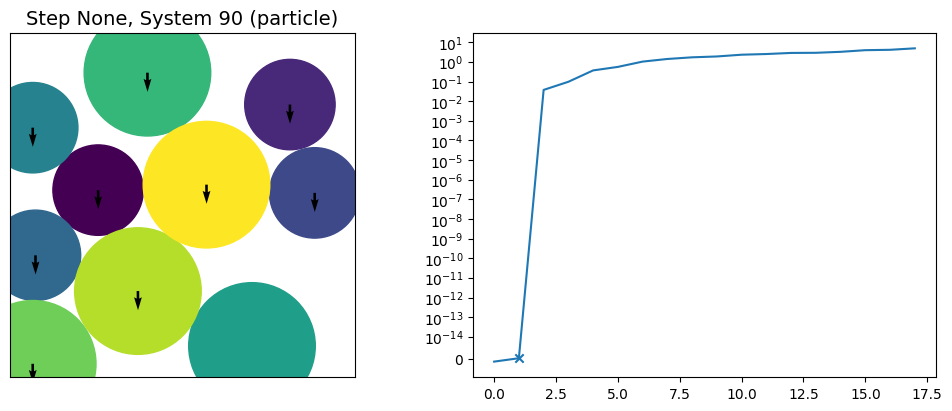

In [21]:
sid = 90
mode_id = 1
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
draw_particles_frame(None, ax[0], data, sid, True, 'particle', 'viridis', 'final')
N = non_rattler_ids_disk[sid].size
pos = np.mod(data.pos[data.system_id == sid][non_rattler_ids_disk[sid]].copy(), data.box_size[sid])
ax[0].quiver(pos[:, 0], pos[:, 1], vec_disk[sid][:N, mode_id], vec_disk[sid][N:2 * N, mode_id])
ax[1].plot(val_disk[sid])
ax[1].scatter(mode_id, val_disk[sid][mode_id], marker='x')
ax[1].set_yscale('symlog', linthresh=1e-14)

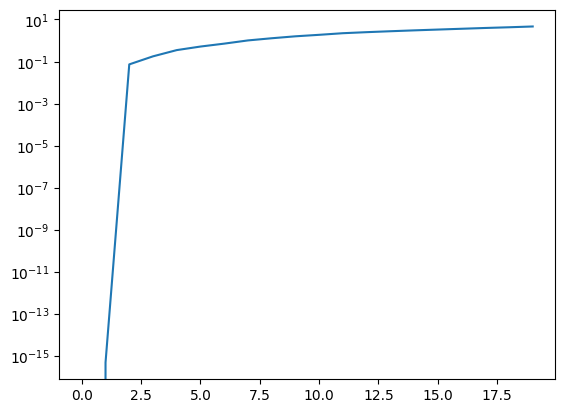

In [22]:
plt.plot(np.mean([val for val in val_disk if len(val) == 20], axis=0))
plt.yscale('log')

# Rigid Bumpy

In [49]:
data = load('/home/mmccraw/dev/data/10-14-25/effective-potential/jamming-large/rb-20-0.10/jamming_0/', location=["final"])

In [51]:
H_rb, M_rb, val_rb, vec_rb, non_rattler_ids_rb = get_dynamical_matrix_modes_for_rigid_bumpy(data)

100%|██████████| 1/1 [00:00<00:00,  5.07it/s]


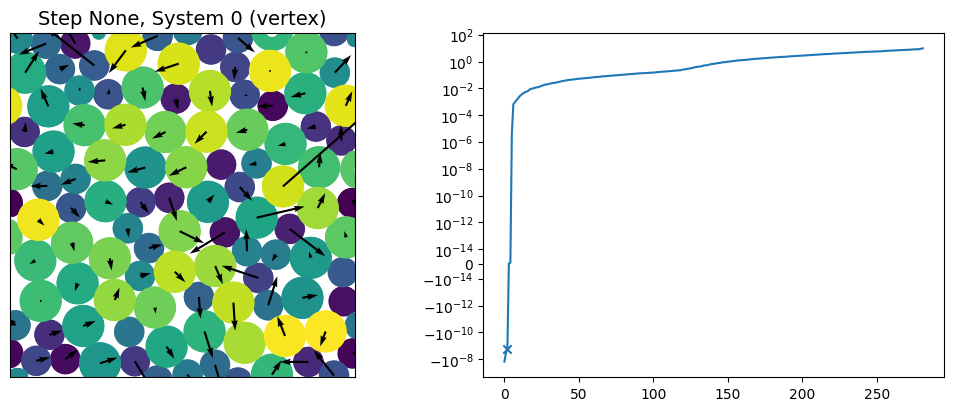

In [52]:
sid = 0
mode_id = 2
fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
draw_particles_frame(None, ax[0], data, sid, True, 'vertex', 'viridis', 'final')
N = non_rattler_ids_rb[sid].size
pos = np.mod(data.pos[data.system_id == sid][non_rattler_ids_rb[sid]].copy(), data.box_size[sid])
ax[0].quiver(pos[:, 0], pos[:, 1], vec_rb[sid][:N, mode_id], vec_rb[sid][N:2 * N, mode_id])
ax[1].plot(val_rb[sid])
ax[1].scatter(mode_id, val_rb[sid][mode_id], marker='x')
ax[1].set_yscale('symlog', linthresh=1e-14)

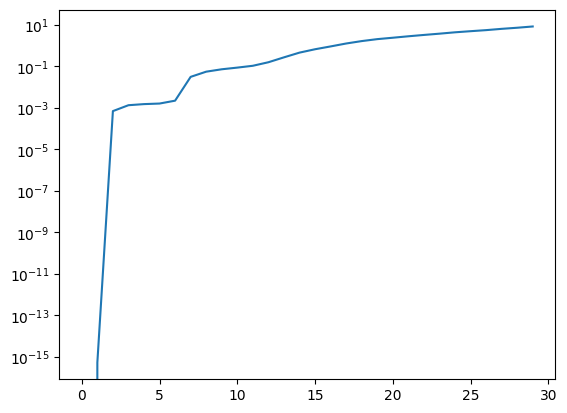

In [46]:
plt.plot(np.mean([val for val in val_rb if len(val) == 30], axis=0))
plt.yscale('log')

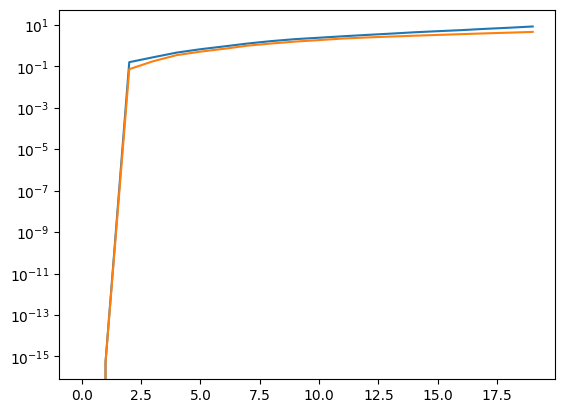

In [44]:
y = np.mean([val for val in val_rb if len(val) == 30], axis=0)
y = np.concatenate((y[:2], y[12:]))
plt.plot(y)
plt.plot(np.mean([val for val in val_disk if len(val) == 20], axis=0))
plt.yscale('log')